In [1]:
import pandas as pd
import geopandas as gpd
import osmnx
from access import access as Access
import matplotlib.pyplot as plt
import urbanaccess as ua
import pandana as pdna
import osmnet

In [2]:
#  https://www.cso.ie/en/census/census2016reports/census2016smallareapopulationstatistics/
ireland = gpd.read_file("../data/Small_Areas_Generalised_20m_-_OSi_National_Statistical_Boundaries_-_2015-shp/0d80d6a5-6314-4a4b-ac2f-09f3767f054b2020329-1-1rx3r8i.iy91.shp")

<AxesSubplot:>

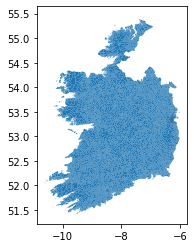

In [3]:
ireland.plot()

In [4]:
ireland.GEOGID

0        A047014001
1        A047034002
2        A047056001
3        A047300001
4        A067162001
            ...    
18636    A267036002
18637    A267080007
18638    A267078024
18639    A267002009
18640    A267002008
Name: GEOGID, Length: 18641, dtype: object

In [5]:
ireland.SMALL_AREA

0                            047014001
1                            047034002
2                            047056001
3                            047300001
4                            067162001
                     ...              
18636                        267036002
18637                        267080007
18638    267078023/267078024/267078025
18639                        267002009
18640                        267002008
Name: SMALL_AREA, Length: 18641, dtype: object

In [6]:
irish_data = pd.read_csv("../data/SAPS2016_SA2017.csv")

In [7]:
irish_data['sa'] = irish_data.GEOGID.str[7:]

In [8]:
irish_data.head()

,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_2_Y,T15_2_N,T15_2_NS,T15_2_T,T15_3_B,T15_3_OTH,T15_3_N,T15_3_NS,T15_3_T,sa
0,4c07d11e-11d3-851d-e053-ca3ca8c0ca7f,SA2017_017001001,Small Area,4,0,2,2,1,5,7,...,97,27,4,128,83,20,23,2,128,017001001
1,4c07d11e-123a-851d-e053-ca3ca8c0ca7f,SA2017_017002001,Small Area,3,2,2,3,1,1,3,...,86,26,2,114,72,18,23,1,114,017002001
2,4c07d11e-14b1-851d-e053-ca3ca8c0ca7f,SA2017_017002002,Small Area,4,2,4,3,4,4,4,...,108,26,4,138,114,5,16,3,138,017002002
3,4c07d11e-14b2-851d-e053-ca3ca8c0ca7f,SA2017_017002003,Small Area,2,2,0,1,1,1,0,...,80,19,4,103,74,13,15,1,103,017002003
4,4c07d11d-f709-851d-e053-ca3ca8c0ca7f,SA2017_017003001,Small Area,2,1,0,5,2,0,1,...,55,24,4,83,50,10,21,2,83,017003001


In [9]:
ireland = ireland.merge(irish_data, left_on='SMALL_AREA', right_on='sa', how='left')

In [10]:
ireland['total_pop'] = ireland.T1_1AGETF + ireland.T1_1AGETM   #  not terribly sure about this data, so blindly assuming these are total femal and male cols

In [11]:
ireland = ireland[['sa', 'total_pop', 'geometry']]

<AxesSubplot:>

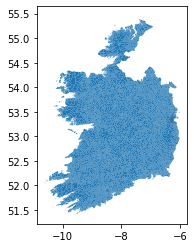

In [12]:
ireland.plot()

In [13]:
dublin_boundry = osmnx.geocoder.geocode_to_gdf('dublin, ireland', which_result=2)

<AxesSubplot:>

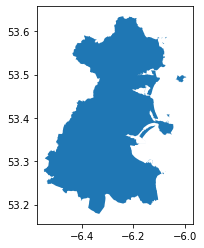

In [14]:
dublin_boundry.plot()

In [15]:
buffer = dublin_boundry.to_crs(29902).buffer(5000).to_crs(4326)

<AxesSubplot:>

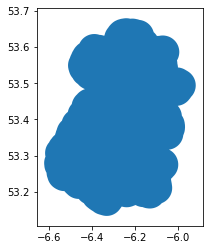

In [16]:
buffer.plot()

In [17]:
dublin = ireland[ireland.representative_point().intersects(dublin_boundry.unary_union)]

<AxesSubplot:>

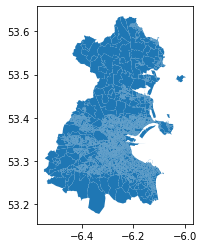

In [18]:
dublin.plot()

In [19]:
tuple(buffer.total_bounds)

(-6.621839396013536, 53.13334561681906, -5.919187760125955, 53.67958772890603)

In [20]:
dublin_net = osmnet.load.network_from_bbox(bbox=tuple(buffer.total_bounds))

Requesting network data within bounding box from Overpass API in 4 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](53.13334562,-6.62186632,53.41448425,-6.26827717);>;);out;'}"
Downloaded 38,141.6KB from www.overpass-api.de in 20.90 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](53.40691485,-6.62186632,53.68010174,-6.25061853);>;);out;'}"
Downloaded 8,304.2KB from www.overpass-api.de in 5.47 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!

In [23]:
loaded_feeds = ua.gtfsfeed_to_df("../data/irish_gtfs/")

GTFS text file header whitespace check completed. Took 1.25 seconds
--------------------------------
Processing GTFS feed: gtfs1
The unique agency id: go-ahead was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.03 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: gtfs
The unique agency id: dublin_bus was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.06 seconds
Unique GTFS feed id operation complete. Took 0.01 seconds
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: gtfs2
The unique agency id: luas was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Too

In [24]:
ua.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='monday',
                                   timerange=['07:00:00', '10:00:00'],
                                   calendar_dates_lookup=None)

Using calendar to extract service_ids to select trips.
12 service_ids were extracted from calendar
16,108 trip(s) 32.47 percent of 49,605 total trip records were found in calendar for GTFS feed(s): ['gtfs1', 'gtfs', 'gtfs2']
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
16,108 of 49,605 total trips were extracted representing calendar day: monday. Took 0.11 seconds
There are no departure time records missing from trips following monday schedule. There are no records to interpolate.
Difference between stop times has been successfully calculated. Took 3.06 seconds
Stop times from 07:00:00 to 10:00:00 succ

In [25]:
ua_net = ua.ua_network

In [26]:
ua_osm = ua.create_osm_net(osm_edges=dublin_net[1],
                              osm_nodes=dublin_net[0],
                              travel_speed_mph=3)

Created OSM network with travel time impedance using a travel speed of 3 MPH. Took 0.00 seconds


In [27]:
ua.integrate_network(urbanaccess_network=ua_net,
                             headways=False
                             )

Loaded UrbanAccess network components comprised of:
     Transit: 6,109 nodes and 115,761 edges;
     OSM: 131,194 nodes and 173,138 edges
Connector edges between the OSM and transit network nodes successfully completed. Took 2.50 seconds
Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 2.90 seconds
Network edge and node network integration completed successfully resulting in a total of 137,303 nodes and 301,117 edges:
     Transit: 6,109 nodes 115,761 edges;
     OSM: 131,194 nodes 173,138 edges; and
     OSM/Transit connector: 12,218 edges.


In [28]:
combined_net = pdna.Network(ua_net.net_nodes["x"],
                            ua_net.net_nodes["y"],
                            ua_net.net_edges["from_int"],
                            ua_net.net_edges["to_int"],
                            ua_net.net_edges[["weight"]])

In [29]:
buffer = buffer.to_frame()

In [30]:
buffer.columns = ['geometry']

In [31]:
buffer.total_bounds

array([-6.6218394 , 53.13334562, -5.91918776, 53.67958773])

In [32]:
buffer.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 136.0 bytes


In [33]:
health = osmnx.pois.pois_from_polygon(buffer.unary_union, tags={'amenity':['doctor', 'hospital'],
                                                         'healthcare': True})

In [34]:
health['care'] = 1

<AxesSubplot:>

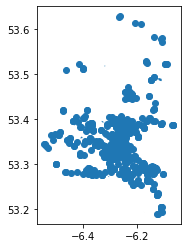

In [35]:
health.plot()

In [36]:
import healthacc as ha

In [37]:
dublin = dublin.groupby('sa').first().reset_index()

In [38]:
tract_adjlist = ha.compute_travel_cost_adjlist(dublin, dublin, combined_net, reindex_dest='sa', reindex_orig='sa')

In [39]:
joined  = gpd.sjoin(dublin, health[['geometry', 'care']], op='intersects', how='left').groupby('sa').sum()['care']

/home/knaaptime/anaconda3/envs/healthacc/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [40]:
dublin = dublin.merge(joined, left_on='sa', right_index=True)

In [41]:
ac = Access(demand_df = dublin,
                              demand_index = 'sa',
                              demand_value = 'total_pop',
                              supply_df    = dublin,
                              supply_index = 'sa',
            cost_df=tract_adjlist,
            cost_origin='origin',
            cost_dest='destination',
            cost_name='cost',
            supply_value='care',
            neighbor_cost_df     = tract_adjlist,
           neighbor_cost_origin = 'origin',
           neighbor_cost_dest   = 'destination',
           neighbor_cost_name   = 'cost'
      )

In [42]:
from access import weights as acweights

In [43]:
gravity = acweights.gravity(scale = 60, alpha = -1)
gaussian = acweights.gaussian(60)

In [44]:
#ac.raam(name = "raam", tau = 60);   not sure why raam doesnt work
ac.two_stage_fca(name = "2sfca", max_cost = 30,)
ac.enhanced_two_stage_fca(name = "g2sfca", weight_fn = gravity)
ac.three_stage_fca(name = "3sfca")
ac.weighted_catchment(name = "gravity", weight_fn = gravity)
ac.weighted_catchment(name = "gaussian", weight_fn = gaussian)
ac.fca_ratio(name = "fca30",      max_cost = 30)
ac.fca_ratio(name = "fca60",      max_cost = 60) 

,fca60_care
sa,
267001001,0.000758
267001002,0.000758
267001003,0.000761
267001004,0.000761
267001005,0.000762
...,...
268162014,0.000757
268162015,NaN
268162016,0.000758


In [47]:
results = dublin[['sa', 'geometry']].merge(ac.access_df, left_on='sa', right_index=True)

In [48]:
import numpy as np

In [49]:
results = results.replace([np.inf, -np.inf] ,np.nan)

In [50]:
results.crs = 4326

In [51]:
results = results.to_crs(3857)

In [52]:
import matplotlib.pyplot as plt

In [53]:
import contextily as ctx

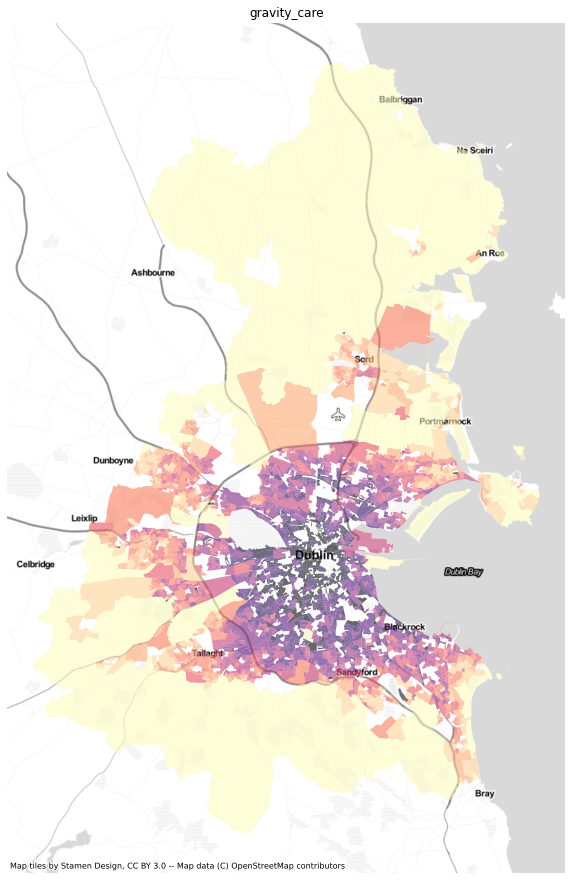

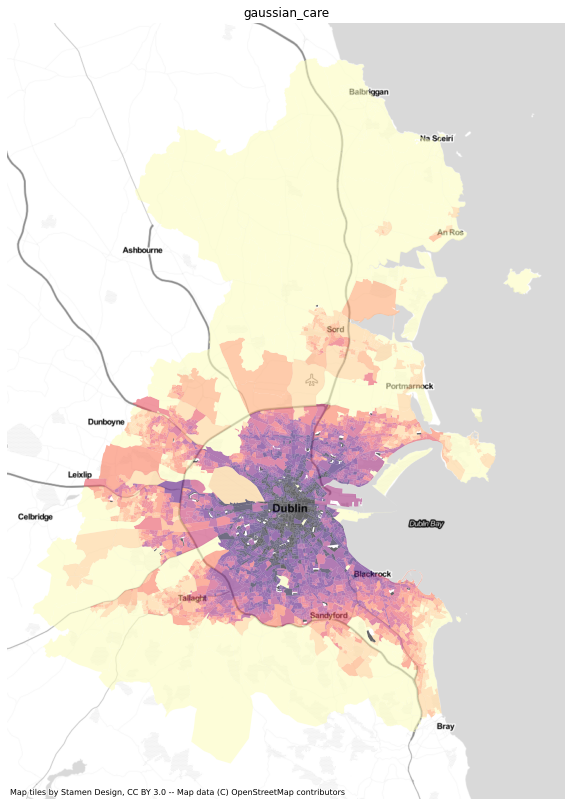

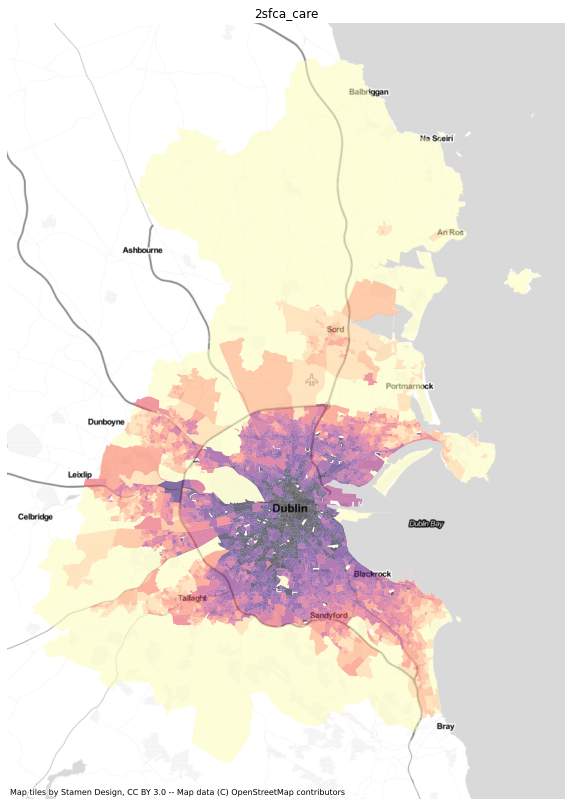

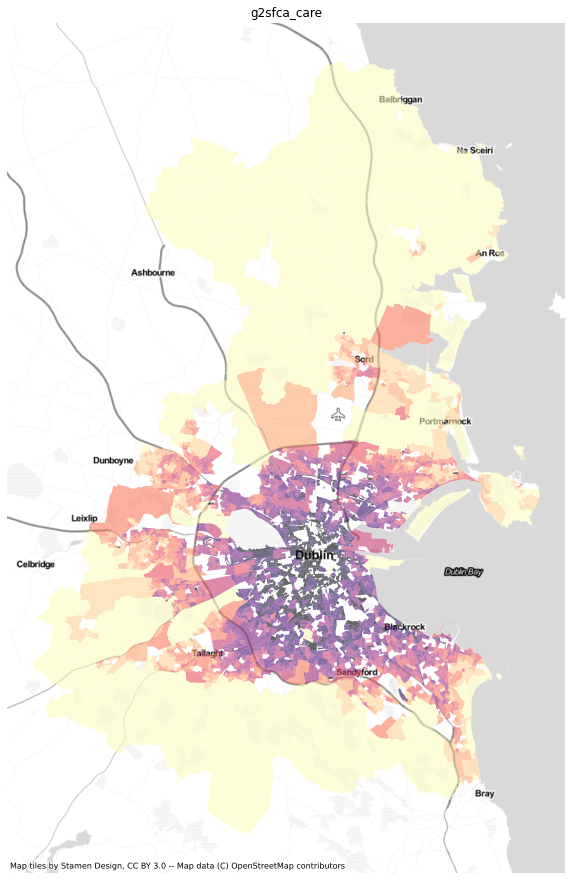

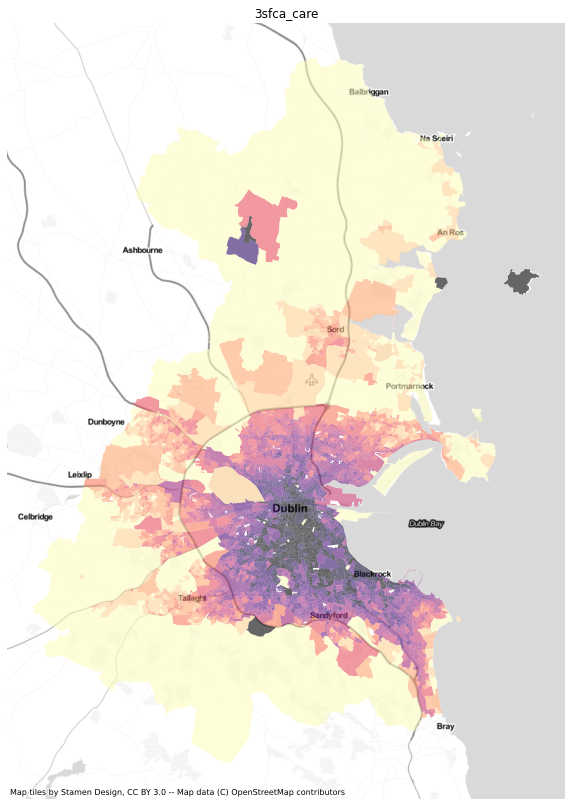

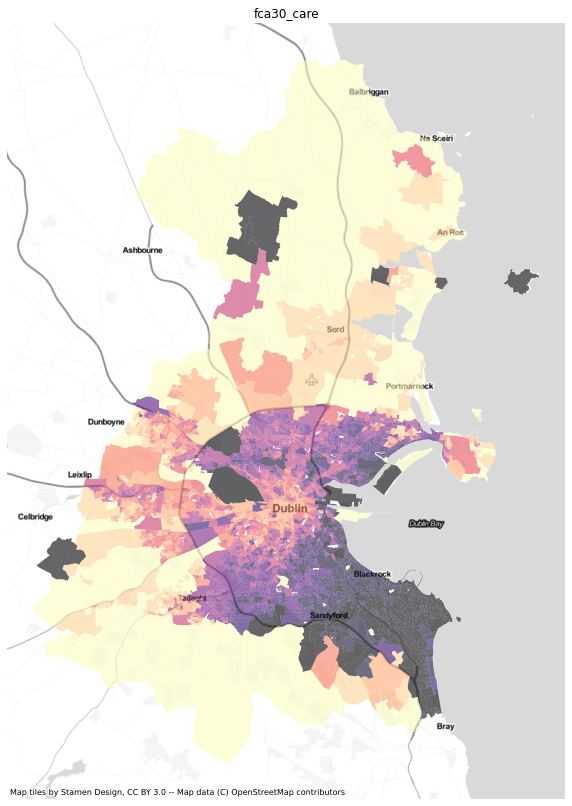

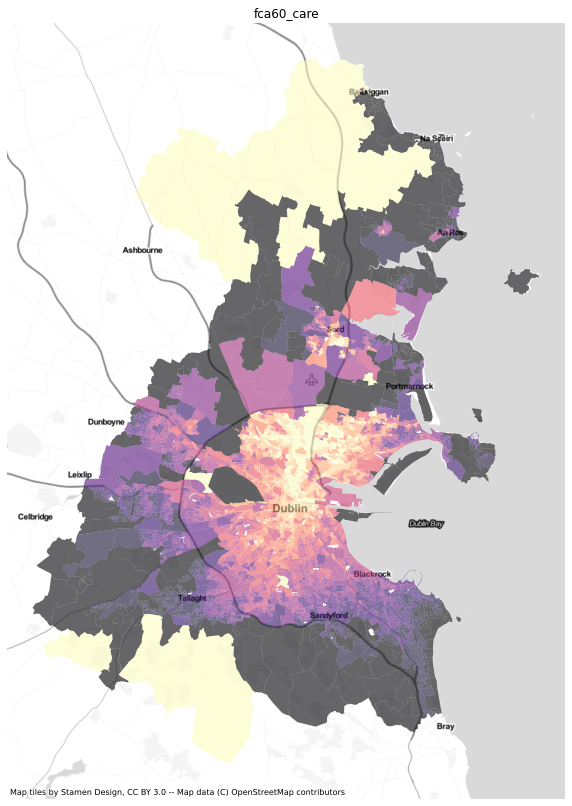

In [54]:
for i in ['gravity_care', 'gaussian_care',
          '2sfca_care', 
         'g2sfca_care', '3sfca_care', 
         'fca30_care', 'fca60_care']:
    fig, ax=plt.subplots( figsize=(10,20))
    results.dropna(subset=[i]).plot(column=i, scheme='quantiles', cmap='magma_r', k=12, ax=ax, alpha=0.6)
    #health.to_crs(3857).plot(ax=ax, color='red')
    ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
    ax.set_title(i)
    ax.axis('off')
    plt.savefig(f"../figures/dublin_{i}.png", dpi=300)
